[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cleanlab/cleanvision-examples/blob/main/cifar10.ipynb)

This notebook runs CleanVision on [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset.

In [ ]:
!pip install -U pip
!pip install "cleanvision[huggingface]"

**After you install these packages, you may need to restart your notebook runtime before running the rest of this notebook.**

In [1]:
import pandas as pd
from datasets import load_dataset, concatenate_datasets


from cleanvision import Imagelab

### Download dataset from Huggingface and save as png files

In [2]:
dataset_dict = load_dataset("cifar10")
dataset = concatenate_datasets([dataset_dict[split] for split in dataset_dict.keys()])

Found cached dataset cifar10 (/home/sanjana/.cache/huggingface/datasets/cifar10/plain_text/1.0.0/447d6ec4733dddd1ce3bb577c7166b986eaa4c538dcd9e805ba61f35674a9de4)


  0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
dataset

Dataset({
    features: ['img', 'label'],
    num_rows: 60000
})

### Run CleanVision

In [4]:
imagelab = Imagelab(hf_dataset=dataset, image_key="img")

In [5]:
imagelab.find_issues()

Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale images ...


  0%|          | 0/60000 [00:00<?, ?it/s]

  0%|          | 0/60000 [00:00<?, ?it/s]

Issue checks completed. To see a detailed report of issues found, use imagelab.report().


### Report all the issues found in the dataset

Issues found in order of severity in the dataset

|    | issue_type      |   num_images |
|---:|:----------------|-------------:|
|  0 | blurry          |          118 |
|  1 | near_duplicates |           40 |
|  2 | dark            |           11 |
|  3 | light           |            3 |
|  4 | low_information |            1 | 


Top 4 examples with blurry issue in the dataset.


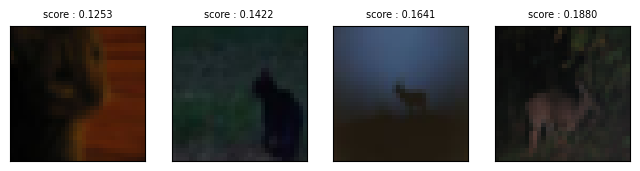


Top 4 sets of images with near_duplicates issue
Set: 0


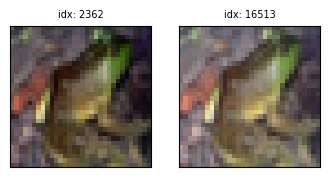

Set: 1


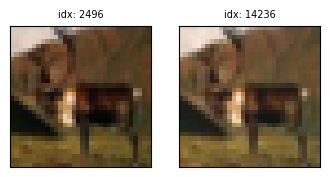

Set: 2


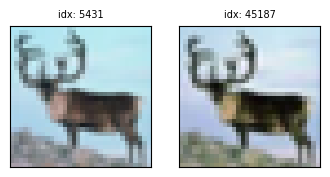

Set: 3


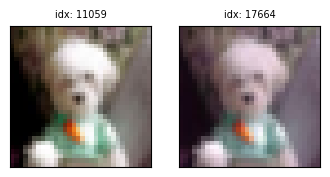


Top 4 examples with dark issue in the dataset.


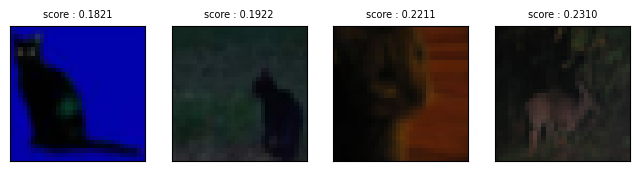

Found 3 examples with light issue in the dataset.


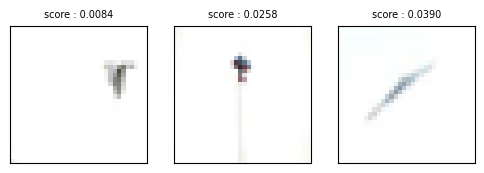

Found 1 example with low_information issue in the dataset.


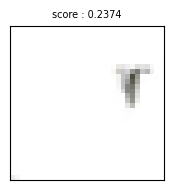

In [6]:
imagelab.report()

View more information about each image, such as what types of issues it exhibits and its quality score with respect to each type of issue.

In [7]:
imagelab.issues

,odd_aspect_ratio_score,is_odd_aspect_ratio_issue,low_information_score,is_low_information_issue,light_score,is_light_issue,grayscale_score,is_grayscale_issue,dark_score,is_dark_issue,blurry_score,is_blurry_issue,exact_duplicates_score,is_exact_duplicates_issue,near_duplicates_score,is_near_duplicates_issue
0,1.0,False,0.813863,False,0.670485,False,1,False,0.761960,False,0.447264,False,1.0,False,1.0,False
1,1.0,False,0.889314,False,0.928179,False,1,False,0.870204,False,0.497561,False,1.0,False,1.0,False
2,1.0,False,0.868758,False,0.799635,False,1,False,0.752100,False,0.507733,False,1.0,False,1.0,False
3,1.0,False,0.883888,False,0.992232,False,1,False,0.872505,False,0.530581,False,1.0,False,1.0,False
4,1.0,False,0.902695,False,0.911035,False,1,False,0.897581,False,0.530771,False,1.0,False,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,1.0,False,0.860407,False,0.794629,False,1,False,0.996078,False,0.523458,False,1.0,False,1.0,False
59996,1.0,False,0.888932,False,0.939203,False,1,False,0.843293,False,0.498186,False,1.0,False,1.0,False
59997,1.0,False,0.818150,False,0.960275,False,1,False,0.865067,False,0.444907,False,1.0,False,1.0,False
59998,1.0,False,0.900018,False,0.892104,False,1,False,0.952069,False,0.528622,False,1.0,False,1.0,False


View global information about each issue, such as how many images in the dataset suffer from this issue.

In [8]:
imagelab.issue_summary

,issue_type,num_images
0,blurry,118
1,near_duplicates,40
2,dark,11
3,light,3
4,low_information,1
5,grayscale,0
6,odd_aspect_ratio,0
7,exact_duplicates,0


View number of sets of near duplicate images

In [9]:
imagelab.info["near_duplicates"]["num_sets"]

20

Visualize 20 sets of near duplicate images


Top 20 sets of images with near_duplicates issue
Set: 0


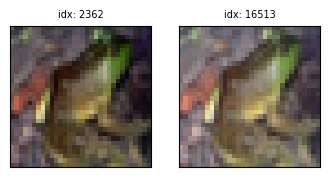

Set: 1


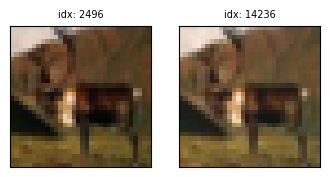

Set: 2


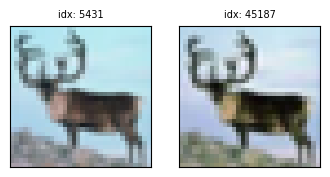

Set: 3


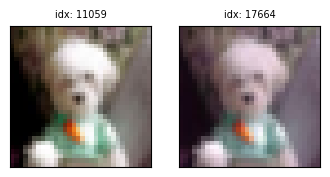

Set: 4


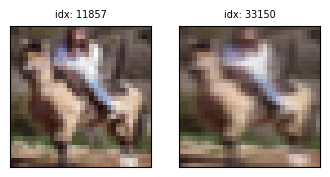

Set: 5


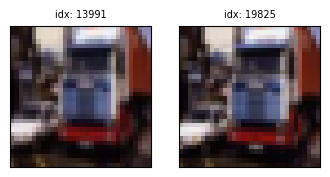

Set: 6


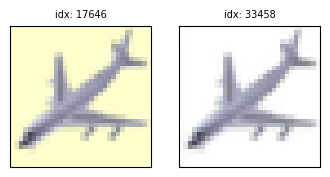

Set: 7


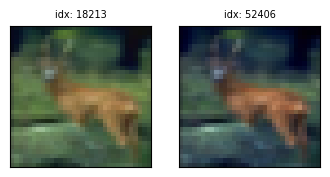

Set: 8


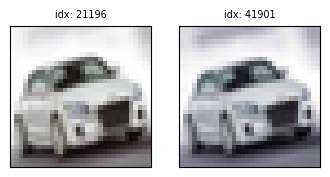

Set: 9


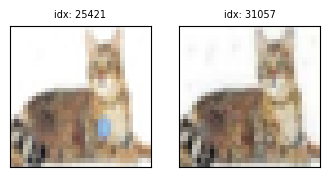

Set: 10


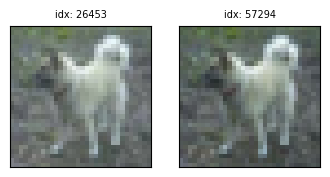

Set: 11


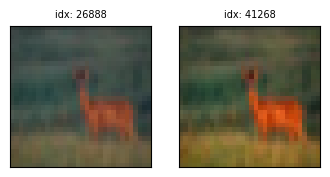

Set: 12


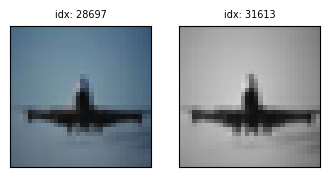

Set: 13


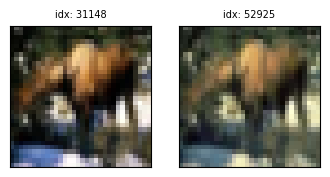

Set: 14


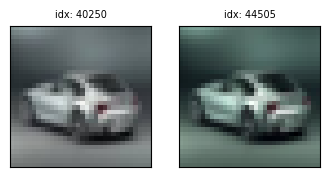

Set: 15


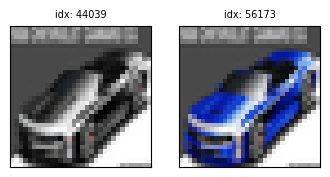

Set: 16


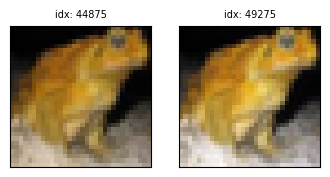

Set: 17


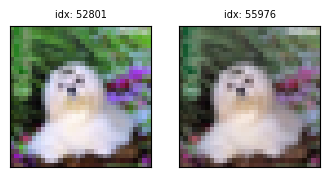

Set: 18


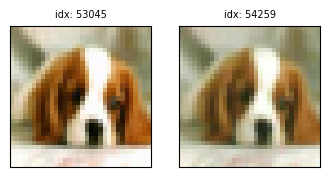

Set: 19


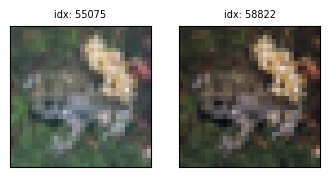

In [10]:
imagelab.visualize(issue_types=["near_duplicates"], num_images=20)